In [11]:
%matplotlib inline
import numpy as np
import xarray as xr
import scipy as sp
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sys
sys.path.append('/Users/gbromley/code/python_utilities/')
from python_data_functions import extract_months


In [15]:
data_dir = '/Users/gbromley/data/CRU/'
output_dir='/Users/gbromley/code/NGP_Climate/'
temp_file = 'tmp/cru_ts3.24.1901.2015.tmp.dat.nc'
nc_temp = xr.open_dataset(data_dir+temp_file)

ngp_mask = xr.open_dataset('/Users/gbromley/Dropbox/Montana_Climate_Project/Study_Area/ngp_mask.nc')

In [5]:
tmp = nc_temp['tmp']

In [24]:
ngp_mask = ngp_mask.rename({'__xarray_dataarray_variable__':'ngp'})

In [9]:
t_season='AMJ'
t_months=[4,5,6]
start_year = '1970-01-01'
end_year = '2015-12-01'
ext_e = -92
ext_w = -120
ext_n = 55
ext_s = 38

In [12]:
#extract the time period we are interested in
temp_subset=tmp.sel(time=slice(start_year,end_year))
#grab the months interested in
temp_months = temp_subset.sel(time=extract_months(temp_subset['time.month'],t_months[0],t_months[-1]))
#create month averages
temp_months_avg = temp_months.groupby('time.year').mean(dim='time')

#extract the 30 yr climate normal times
temp_30= tmp.sel(time=slice('1980-01-01','2011-01-01'))
#grab the months
temp_30_months = temp_30.sel(time=extract_months(temp_30['time.month'],t_months[0],t_months[-1]))
#create averages over months for climate normal
temp_30_climatology = temp_30_months.mean(dim='time')

In [14]:
#create 2d structure to hold slope
spatial_trend = tmp.isel(time=1).copy(deep=True)
spatial_trend.name = 't2m_trend'
spatial_trend.attrs['units'] = 'C per Decade'
spatial_trend.attrs['long_name'] = '2 meter temperature trend'

spatial_trend = tmp.isel(time=1).copy(deep=True)
spatial_trend.name = 'lag_corr'
spatial_trend.attrs['long_name'] = 'lag_1 autocorrelation'


In [19]:
#calculate slope and pvalue for each grid point
#replace with a map() call?
corr_vals = np.arange(0,len(temp_months_avg))
corr_vals_2 = sm.add_constant(corr_vals)
for i in np.arange(0,len(tmp['lat'])):
    for j in np.arange(0,len(tmp['lon'])):
        series = temp_months_avg[:,i,j]
        anom = series - temp_30_climatology[i,j]
        model = sm.OLS(anom.values,corr_vals_2)
        #slope_2, intercept_2, r_value_2, p_value_2, std_err_2 = stats.linregress(corr_vals,anom.values)
        results = model.fit()
        slope = results.params[1]
        #t_value = ((slope - 0.02)/results.bse[1])
        #p_value = stats.t.cdf(t_value, results.df_resid)
       # p_value = stats.t.sf(results.tvalues[0], results.df_resid)
        spatial_trend[i,j]=slope*10
        #slope_scipy[i,j] = slope_2*10
        #pvalues[i,j]= p_value
        #print(i)

In [42]:
mask = ngp_mask['ngp']

In [44]:
mask

<xarray.DataArray 'ngp' (lat: 360, lon: 720)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float64 -89.75 -89.25 -88.75 -88.25 -87.75 -87.25 -86.75 ...
  * lon      (lon) float64 -179.8 -179.2 -178.8 -178.2 -177.8 -177.2 -176.8 ...

In [50]:
ngp = spatial_trend.where(mask==1)

/Users/gbromley/anaconda/envs/paper1_research/lib/python3.6/site-packages/xarray/core/dtypes.py:23: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(dtype, float):


In [53]:
ngp_stacked = ngp.stack(z =('lat','lon'))

In [88]:
ngp_trend = test_stacked.dropna('z').values

In [64]:
globe = spatial_trend.stack(z=('lat','lon'))

In [68]:
globe_trend = globe.dropna('z').values

[1.48323939e-05 0.00000000e+00 0.00000000e+00 2.96647879e-05
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.48323939e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.96647879e-05 2.96647879e-05
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.48323939e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 7.41619697e-05 1.03826758e-04 2.07653515e-04 3.70809849e-04
 3.55977455e-04 4.44971818e-04 4.74636606e-04 5.93295758e-04
 6.52625334e-04 1.09759715e-03 2.19519430e-03 4.52388015e-03
 1.69089291e-02 4.09077425e-02 9.42598635e-02 1.44556511e-01
 1.80109760e-01 1.53708098e-01 1.14832394e-01 8.52269356e-02
 6.08721448e-02 3.79709285e-02 2.23820825e-02 1.55443489e-02
 1.46692376e-02 2.684663

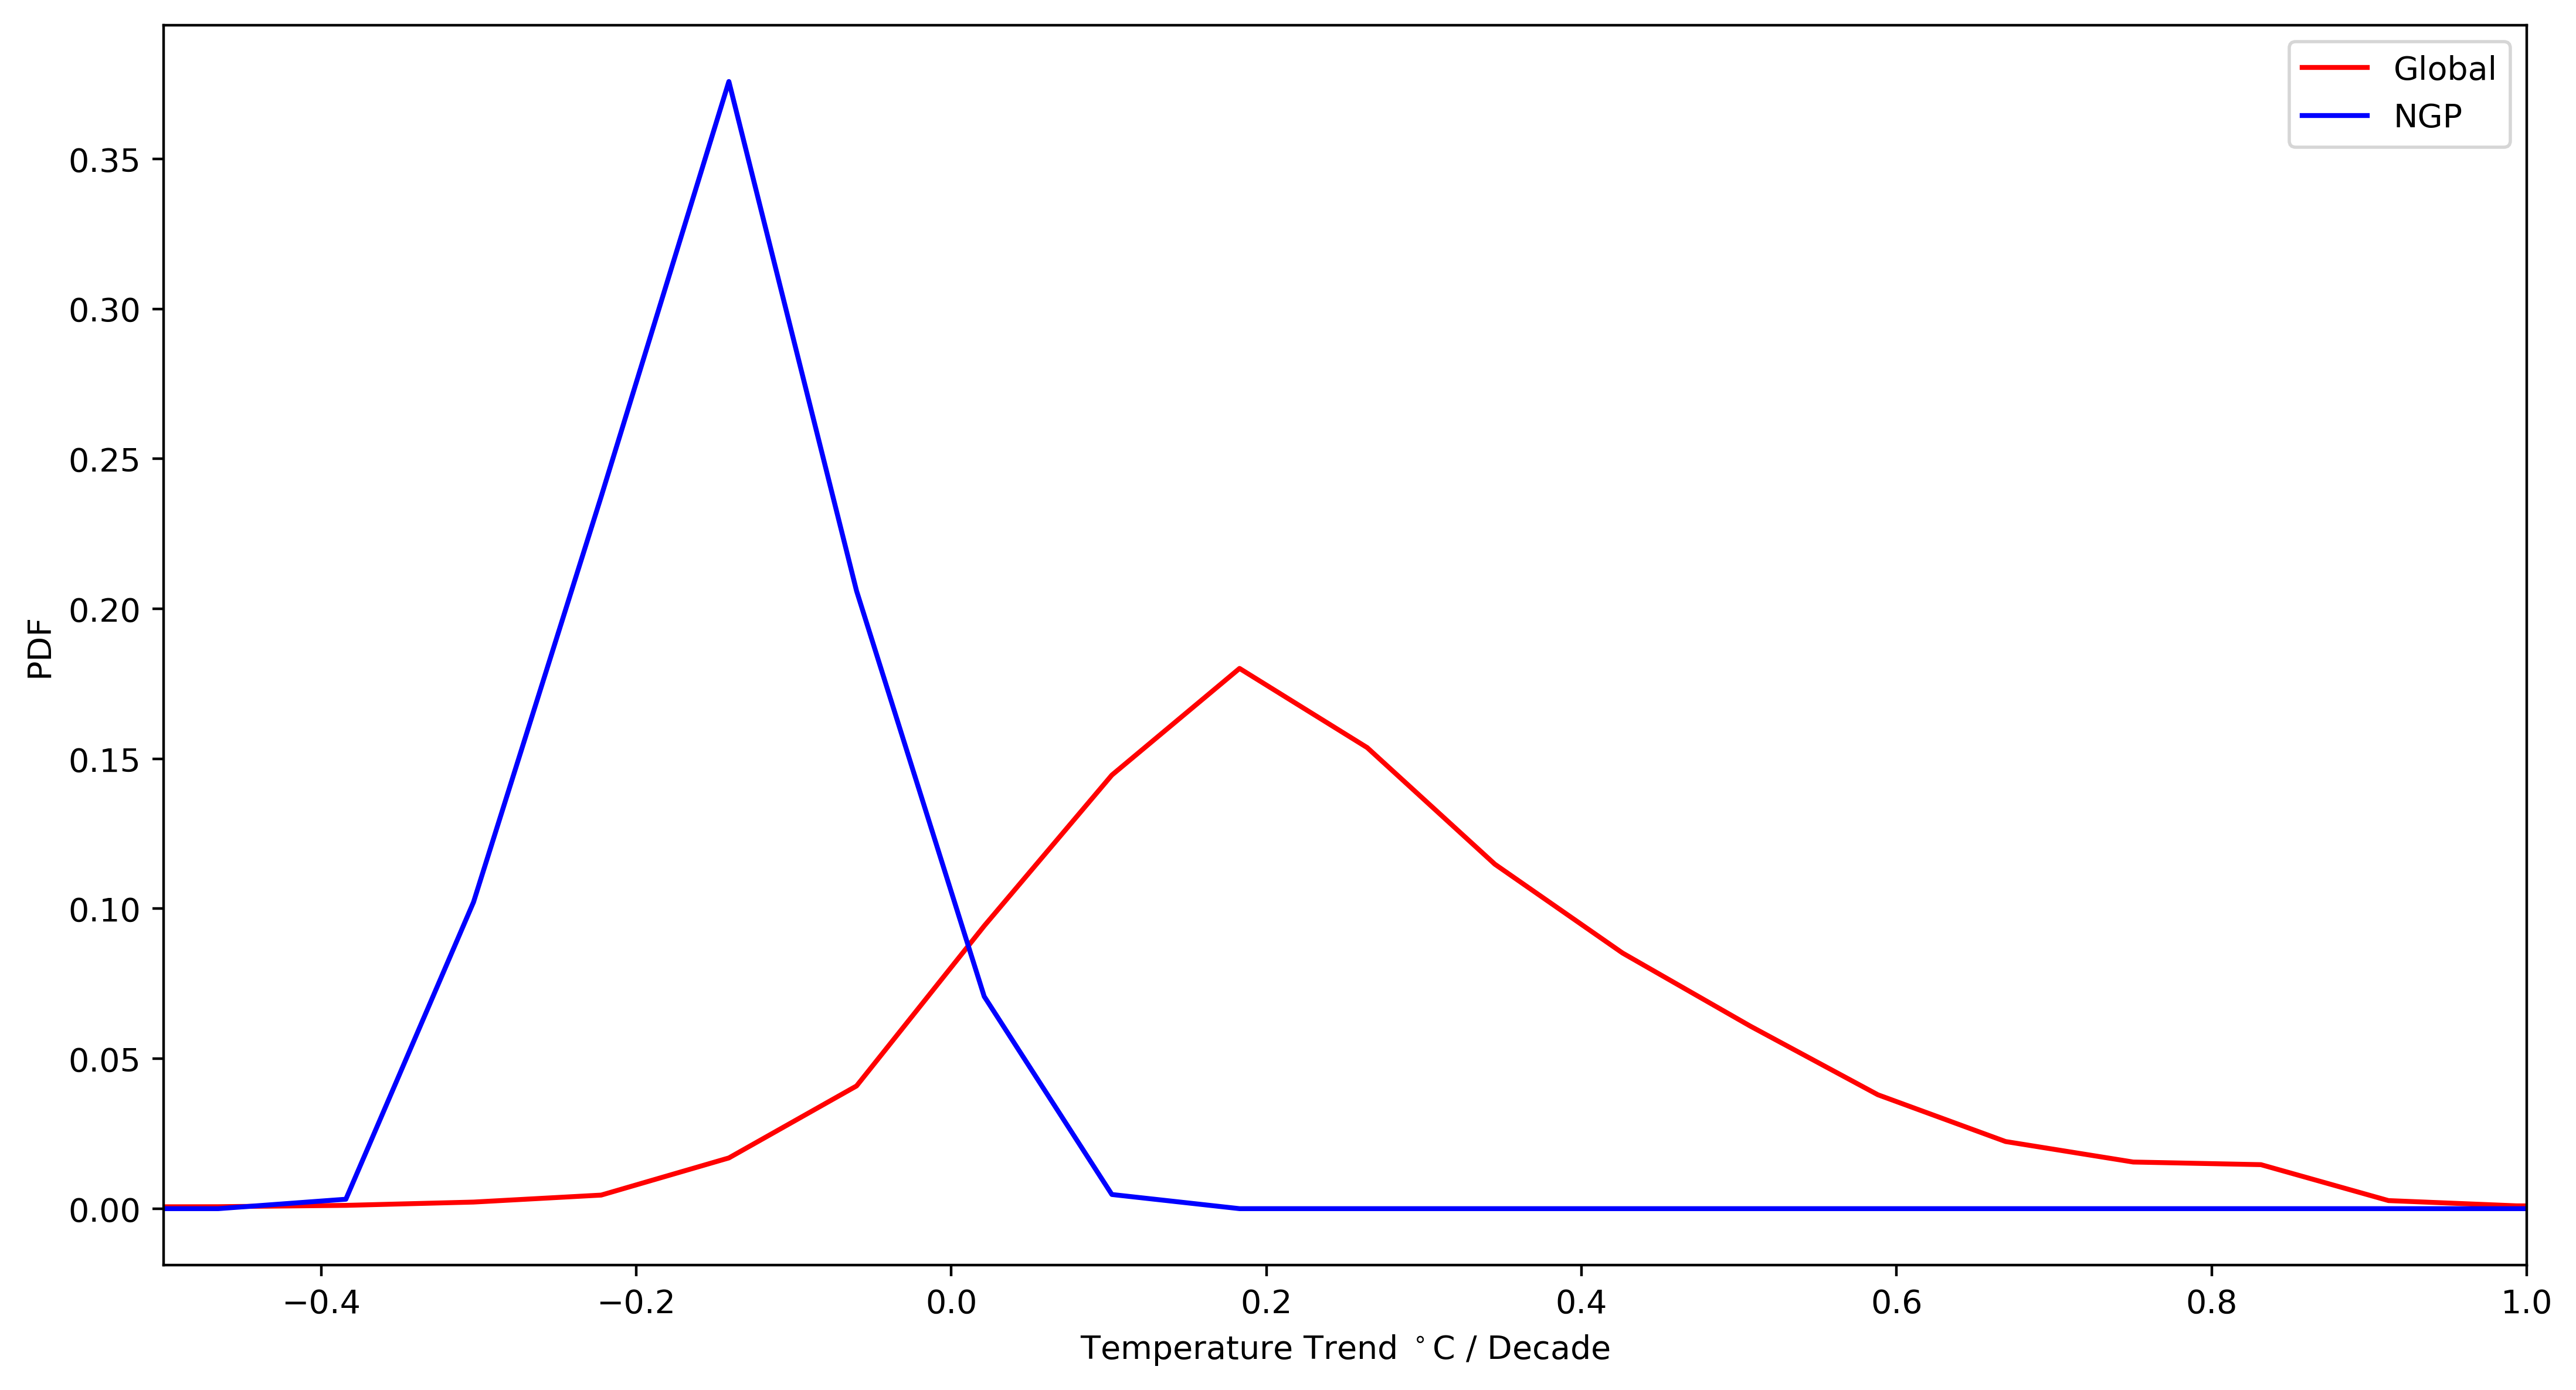

In [208]:
gtrend_array, bins_2 = np.histogram(globe_trend, bins=100)

ngp_trend_array, bins_3 = np.histogram(ngp_trend, bins=bins_2)

gtrend_array_2 = gtrend_array/sum(gtrend_array)
ngp_trend_array_2 = ngp_trend_array/sum(ngp_trend_array)
print(gtrend_array_2)
print(ngp_trend_array_2)
fig, ax = plt.subplots()
ax.plot(bins_2[0:100],gtrend_array_2,label='Global',color='red')
ax.plot(bins_2[0:100],ngp_trend_array_2,label='NGP',color='blue')
ax.set_xlim([-.5,1])
ax.legend()
ax.set_xlabel('Temperature Trend $^\circ$C / Decade')
ax.set_ylabel('PDF')
#plt.xticks(bins_2)
#ax.set_xticks(np.arange(-1,-3),len(gtrend_array_2))
fig.set_size_inches(13,7)
fig.set_dpi(400)
plt.savefig('/Users/gbromley/Dropbox/Montana_Climate_Project/NGP_Climatology_Paper/Figures/pdf_ngp_global.png')
plt.show()

In [198]:
x_limits = np.linspace(-1,3,len(gtrend_array_2))

In [199]:
x_limits

array([-1.        , -0.95959596, -0.91919192, -0.87878788, -0.83838384,
       -0.7979798 , -0.75757576, -0.71717172, -0.67676768, -0.63636364,
       -0.5959596 , -0.55555556, -0.51515152, -0.47474747, -0.43434343,
       -0.39393939, -0.35353535, -0.31313131, -0.27272727, -0.23232323,
       -0.19191919, -0.15151515, -0.11111111, -0.07070707, -0.03030303,
        0.01010101,  0.05050505,  0.09090909,  0.13131313,  0.17171717,
        0.21212121,  0.25252525,  0.29292929,  0.33333333,  0.37373737,
        0.41414141,  0.45454545,  0.49494949,  0.53535354,  0.57575758,
        0.61616162,  0.65656566,  0.6969697 ,  0.73737374,  0.77777778,
        0.81818182,  0.85858586,  0.8989899 ,  0.93939394,  0.97979798,
        1.02020202,  1.06060606,  1.1010101 ,  1.14141414,  1.18181818,
        1.22222222,  1.26262626,  1.3030303 ,  1.34343434,  1.38383838,
        1.42424242,  1.46464646,  1.50505051,  1.54545455,  1.58585859,
        1.62626263,  1.66666667,  1.70707071,  1.74747475,  1.78

In [156]:
test = gtrend_array/len(globe_trend)

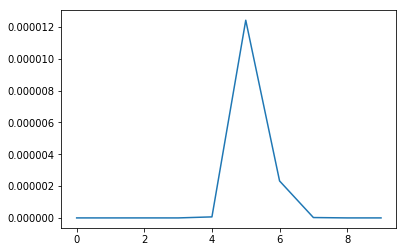

In [158]:
plt.plot(test)

([array([1.83030272e-04, 0.00000000e+00, 0.00000000e+00, 3.66060543e-04,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         1.83030272e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 3.66060543e-04, 3.66060543e-04,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         1.83030272e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         9.15151358e-04, 1.28121190e-03, 2.56242380e-03, 4.57575679e-03,
         4.39272652e-03, 5.49090815e-03, 5.85696869e-03, 7.32121087e-03,
         8.05333195e-03, 1.35442401e-02, 2.70884802e-02, 5.58242329e-02,
         2.08654510e-01, 5.04797489e-01, 1.16315738

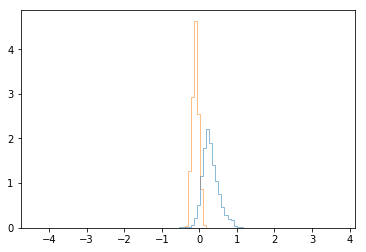

In [184]:
plt.hist([globe_trend,ngp_trend], bins=100,density=True,alpha=0.5,histtype='step')

In [145]:
len(ngp_trend)

636

In [146]:
len(globe_trend)

67420